### Aims
* clean
* visualise
* analyse with plotly dashboard

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [147]:
df = pd.read_csv('audible_uncleaned.csv')
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [148]:
print(df.shape)
print(df.columns)
print(df.info())

(87489, 8)
Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'stars', 'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB
None


In [149]:
df.name.duplicated().sum()  # Check for duplicate rows

4722

### Thoughts
* Author has 'Written by' at the beginning and then no space between first name and surname
* narrator has similar problem
* time can be converted to a 24 hour system i think
* Language - check syntax as unique values
* stars column is  mess - seperate into rating and number of ratings. 'not yet rated' (na) if substantial then remove??
* price - convert dtype
* why are there so many names duplicated?

#### Author  column

In [150]:
# author column
print(df.author.head(20))
df.author.tail(20)

0      Writtenby:GeronimoStilton
1          Writtenby:RickRiordan
2           Writtenby:JeffKinney
3          Writtenby:RickRiordan
4          Writtenby:RickRiordan
5       Writtenby:SuzanneCollins
6         Writtenby:WinterMorgan
7          Writtenby:RickRiordan
8      Writtenby:MaryPopeOsborne
9          Writtenby:RickRiordan
10         Writtenby:RickRiordan
11     Writtenby:MaryPopeOsborne
12     Writtenby:MaryPopeOsborne
13         Writtenby:RickRiordan
14       Writtenby:PhilipPullman
15     Writtenby:GeronimoStilton
16     Writtenby:MaryPopeOsborne
17    Writtenby:ShannonMessenger
18     Writtenby:MaryPopeOsborne
19    Writtenby:ShannonMessenger
Name: author, dtype: object


87469                   Writtenby:MarkTwain
87470               Writtenby:LarryMcMurtry
87471                  Writtenby:JeffShaara
87472              Writtenby:LaurenceSterne
87473                  Writtenby:JeffShaara
87474              Writtenby:StephenBrennan
87475              Writtenby:ElisabethEaves
87476              Writtenby:ChelseaHandler
87477            Writtenby:PeterMatthiessen
87478                Writtenby:EdithWharton
87479        Writtenby:MattSmith,KarenSmith
87480                Writtenby:ColinThubron
87481                Writtenby:ColinThubron
87482    Writtenby:DonWatson,HamishHamilton
87483             Writtenby:RogerW.Thompson
87484                Writtenby:ChrisStewart
87485               Writtenby:StephenO'Shea
87486                   Writtenby:MarkTwain
87487              Writtenby:LaurenceSterne
87488               Writtenby:MarkKurlansky
Name: author, dtype: object

In [151]:
print(df.author.value_counts())
df.narrator.value_counts()


author
Writtenby:矢島雅弘,石橋遊                                              874
Writtenby:SmartReading                                          405
Writtenby:中西貴之,BJ                                               311
Writtenby:div.                                                  274
Writtenby:OnlineStudioProductions                               212
                                                               ... 
Writtenby:AlessandroGoglio,AndreaGoldstein                        1
Writtenby:DianaThomas,StaceyBoyle                                 1
Writtenby:KarieWillyerd,BarbaraMistick,JosephGrenny-foreword      1
Writtenby:FrancesKay                                              1
Writtenby:StephenO'Shea                                           1
Name: count, Length: 48374, dtype: int64


narrator
Narratedby:anonymous                      1034
Narratedby:矢島雅弘,石橋遊                        874
Narratedby:Intuitive                       465
Narratedby:uncredited                      326
Narratedby:中西貴之,BJ                         311
                                          ... 
Narratedby:HannahB.                          1
Narratedby:DavidSimonM.D.,DeepakChopra       1
Narratedby:CorinneZupko                      1
Narratedby:SandraIngerman                    1
Narratedby:ChrisStewart                      1
Name: count, Length: 29717, dtype: int64

In [152]:
# get rid of wrritenby
df['author'] = df.author.str.replace('Writtenby:', '', regex=False)
# potential problems with commas and multiple authors and that names are one string without surnames seperated.

#### Narrator column

In [153]:
# get rid of Narratedby
df['narrator'] = df.narrator.str.replace('Narratedby:', '', regex=False)
df.head()
# again potential problems with commas and multiple narrators and that names are one string without surnames seperated.

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


#### Time column
split intp hours and minutes columns and then do aggregate minutes (better for an aggregate plot.)

In [154]:
df.time
df['hours'] = df['time'].str.extract(r'(\d+)\s*hr') # regex formula to grab digits followed by hr
df['minutes'] = df['time'].str.extract(r'(\d+)\s*min')

df['hours'] = pd.to_numeric(df['hours'], errors='coerce').fillna(0).astype(int) # catches any mistakes in the regex and converts to int
df['minutes'] = pd.to_numeric(df['minutes'], errors='coerce').fillna(0).astype(int)
df.head()


,name,author,narrator,time,releasedate,language,stars,price,hours,minutes
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,2,20
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,13,8
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,2,3
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,11,16
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,10,0


#### Release date column
* convert to datetime.

In [155]:
# first check consistent syntax
# Check if each row matches the pattern: 2 digits - 2 digits - 2 digits
df['date_syntax'] = df['releasedate'].str.match(r'^\d{2}-\d{2}-\d{2}$')
df['date_syntax'].value_counts() # all the same syntax

df['release_date'] = pd.to_datetime(df['releasedate'], format='%d-%m-%y', errors='coerce')  # Convert to datetime
df.drop(columns=['releasedate', 'date_syntax'], inplace=True)  # Drop the old column
df.head()  # Check the new datetime column



,name,author,narrator,time,language,stars,price,hours,minutes,release_date
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,English,5 out of 5 stars34 ratings,468.00,2,20,2008-08-04
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,English,4.5 out of 5 stars41 ratings,820.00,13,8,2018-05-01
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,English,4.5 out of 5 stars38 ratings,410.00,2,3,2020-11-06
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,English,4.5 out of 5 stars12 ratings,615.00,11,16,2021-10-05
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,English,4.5 out of 5 stars181 ratings,820.00,10,0,2010-01-13


#### language column
* check value counts and unique

In [156]:
print(df.language.value_counts())
df.language.unique()

language
English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
korean                  4
slovene                 4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: count, dtype: int64


array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

* make all lower case
* change mandarin_chinese to just mandarin.

In [157]:
df['language'] = df.language.str.lower()  # make all lower case
df['language'] = df['language'].str.replace('mandarin_chinese', 'mandarin', regex=False)  # change mandarin_chinese to just mandarin
df.language.unique()  # check the unique values again

array(['english', 'hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin', 'basque', 'korean', 'arabic',
       'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian', 'telugu',
       'lithuanian'], dtype=object)

#### Name Column
* lots of repeat values

In [158]:
df.name.unique() # check the unique values in the name column
df.name.value_counts()  # check the value counts in the name column

name
The Art of War                                           20
Sterling Biographies                                     19
The Odyssey                                              16
Sterling Point Books                                     16
Hamlet                                                   15
                                                         ..
Resumen de Inteligencia artificial de Pablo Rodríguez     1
Resumen de La clave de la venta de Jeffrey Lipsius        1
SDGsが生み出す未来のビジネス（できるビジネス）                                 1
弱者のポジショニング戦略                                              1
Havana                                                    1
Name: count, Length: 82767, dtype: int64

In [159]:
# checkout all the rows with 'the art of war' in the name column
df[df.name.str.contains('the art of war', case=False, na=False)]
# different authors, narrators, prices - hmmmmm

,name,author,narrator,time,language,stars,price,hours,minutes,release_date
13379,Die Kunst des Krieges / The Art of War,SunTzu,JürgenFritsche,3 hrs and 12 mins,german,Not rated yet,300.00,3,12,2021-02-26
15112,The Art of War,SunTzu,PhillipJMather,1 hr and 8 mins,english,Not rated yet,333.00,1,8,2015-12-11
27341,Chanakya and the Art of War,RadhakrishnanPillai,AbhishekSharma,5 hrs and 11 mins,english,4.5 out of 5 stars71 ratings,879.00,5,11,2021-03-13
27377,The Art of War,SunTzu,AidanGillen,1 hr and 7 mins,english,4 out of 5 stars511 ratings,333.00,1,7,2015-03-31
27529,The Art of War for Women,Chin-NingChu,MargueriteGavin,5 hrs and 54 mins,english,5 out of 5 stars1 rating,586.00,5,54,2007-05-08
27977,The Art of War,SunTzu,MelFoster,1 hr and 23 mins,english,4 out of 5 stars4 ratings,333.00,1,23,2016-12-06
27995,The Art of War,SunTzu,DenmaTranslationGroup,3 hrs and 51 mins,english,5 out of 5 stars1 rating,501.00,3,51,2016-08-12
29508,The Art of War,SunTzu,AlecSand,1 hr and 46 mins,english,4 out of 5 stars4 ratings,268.00,1,46,2009-09-18
29673,The Art of War,SunTzu,"DonHagen,VictoriaGordon",6 hrs and 29 mins,english,3.5 out of 5 stars3 ratings,668.00,6,29,2011-09-22
29777,The Art of War,"ThomasCleary-translator,SunTzu",LloydJames,1 hr and 54 mins,english,5 out of 5 stars6 ratings,377.00,1,54,2018-04-03


#### Stars column
* Change not rated yet to na
* Then do a rating column and a number of ratings column

In [160]:
df['stars'] = df['stars'].replace("Not rated yet", np.nan)  # Change 'Not rated yet' to NaN
#check percentage of Nan in stars
print(df['stars'].isna().mean() * 100)  # Percentage of NaN values in the stars column
# remove stars column
df.drop(columns=['stars'], inplace=True)  # Drop the stars column
df.head()

82.77269142406473


,name,author,narrator,time,language,price,hours,minutes,release_date
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,english,468.00,2,20,2008-08-04
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,english,820.00,13,8,2018-05-01
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,english,410.00,2,3,2020-11-06
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,english,615.00,11,16,2021-10-05
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,english,820.00,10,0,2010-01-13


#### Price column
* check for all numeric
* noticed a book that had value FREE - change to 0

In [161]:
df.dtypes
#df['price'] = df['price'].astype(float)
# This checks for anything that's not a digit
df['has_non_numeric'] = df['price'].str.contains(r'[^0-9.]', na=False)
df[df['has_non_numeric']] # ahh just commas i think
df['price_clean'] = df['price'].str.replace(r'[^0-9.]', '', regex=True)
df['price_clean'] = pd.to_numeric(df['price_clean'], errors='coerce')  # Convert to numeric, coercing errors to NaN
df[df['has_non_numeric']] # ahh just commas i think
print(df['price_clean'].isna().mean() * 100)  # Percentage of NaN values in the price column
df.describe()

## percentage of nan values is 0.386% So very little, should I just drop these or impute? explain how i should verify this is a good diea
# also want to be able to see why a value becomes nan, can you help me do this




0.38633428202402587


,hours,minutes,release_date,price_clean
count,87489.000000,87489.000000,87489,87151.000000
mean,6.489570,28.123456,2018-06-23 22:53:20.411480064,561.177266
min,0.000000,0.000000,1998-12-27 00:00:00,11.000000
25%,2.000000,13.000000,2016-09-06 00:00:00,279.000000
50%,6.000000,27.000000,2020-02-06 00:00:00,585.000000
75%,9.000000,43.000000,2021-08-17 00:00:00,759.000000
max,143.000000,59.000000,2025-11-14 00:00:00,7198.000000
std,6.060178,17.337883,NaN,334.936411


338
language
english       188
french         13
german          3
hindi         113
italian         2
portuguese     17
spanish         1
tamil           1
dtype: int64
release_date
2006-06-08     1
2008-06-11     1
2010-08-03     1
2010-08-23     1
2011-06-09     3
              ..
2022-02-11     9
2022-02-21    15
2022-02-24     1
2022-03-23     1
2022-03-30     1
Length: 141, dtype: int64
narrator
ASMRGlow              1
AbhishekSharma        4
AdamRutherford        1
AdamSavage            1
AdnanKapadia          1
                     ..
VivekVijayakumaran    1
WandaSykes            1
YannickLopez          1
afullcast             1
fullcast              1
Length: 195, dtype: int64


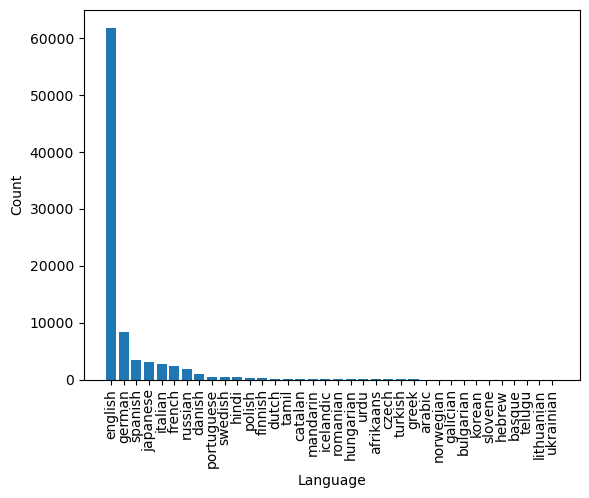

In [162]:
# looks like nans are few, should check if they are missing not at random as then dropping may introduce bias. 
print(df['price_clean'].isna().sum())
# Check te nans are not in one specific groups across the other columns
print(df[df['price_clean'].isna()].groupby('language').size()) 

print(df[df['price_clean'].isna()].groupby('release_date').size()) 

print(df[df['price_clean'].isna()].groupby('narrator').size()) 


plt.bar(df['language'].value_counts().index, df['language'].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()
# shows that 
# cant see anything to suggest MNAR, so dropping is fine

In [163]:
free = df[df['price_clean'].isna()][['price', 'price_clean']]
free.price.unique()  # check the unique values in the price column to see if it always just free
# ET VOILA! the nans are just price columns that are free
# so dont drop just convert to 0
df['price_clean'].fillna(0, inplace=True)  # Fill NaN values with 0
df.info() # yep great no nan
df.drop(columns=['has_non_numeric', 'price', 'time'], inplace=True)  # Drop the helper column and price old
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             87489 non-null  object        
 1   author           87489 non-null  object        
 2   narrator         87489 non-null  object        
 3   time             87489 non-null  object        
 4   language         87489 non-null  object        
 5   price            87489 non-null  object        
 6   hours            87489 non-null  int32         
 7   minutes          87489 non-null  int32         
 8   release_date     87489 non-null  datetime64[ns]
 9   has_non_numeric  87489 non-null  bool          
 10  price_clean      87489 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 6.1+ MB


,name,author,narrator,language,hours,minutes,release_date,price_clean
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,english,2,20,2008-08-04,468.0
1,The Burning Maze,RickRiordan,RobbieDaymond,english,13,8,2018-05-01,820.0
2,The Deep End,JeffKinney,DanRussell,english,2,3,2020-11-06,410.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,english,11,16,2021-10-05,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,english,10,0,2010-01-13,820.0


### Next processing
* want to think of a way to sort these names (probs using regex)
